In [2]:

from explore_data import *

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint


In [3]:
data_root = "./titanic/" # locate our data
X, y = prepare_data(data_root) # prepare features X and target y
X.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
X_numeric, X_object = split_features(X) # split in numeric and object features

In [5]:
X_object.nunique() # explore one_hot encoding potential

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [6]:
X_object = X_object.drop(["Name", "Ticket", "Cabin"], axis=1) # drop columns with more than 20 unique values
X_object.head

<bound method NDFrame.head of         Sex Embarked
0      male        S
1    female        C
2    female        S
3    female        S
4      male        S
..      ...      ...
886    male        S
887  female        S
888  female        S
889    male        C
890    male        Q

[891 rows x 2 columns]>

In [7]:
nan_counts = X_numeric.isna().sum()
nan_counts

PassengerId      0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [8]:
means = X_numeric.mean()
X_numeric = X_numeric.fillna(means)

In [9]:
X_object = pd.get_dummies(X_object)
X_object.head

<bound method NDFrame.head of      Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S
0         False      True       False       False        True
1          True     False        True       False       False
2          True     False       False       False        True
3          True     False       False       False        True
4         False      True       False       False        True
..          ...       ...         ...         ...         ...
886       False      True       False       False        True
887        True     False       False       False        True
888        True     False       False       False        True
889       False      True        True       False       False
890       False      True       False        True       False

[891 rows x 5 columns]>

In [10]:
X_object = X_object.astype(int)
X_object.head(5)

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [11]:
X = pd.concat([X_numeric, X_object], axis=1)
X.head(5)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,1


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
y_pred = model.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8324022346368715

In [16]:
param_dist = {'n_estimators': randint(30,250),
              'max_depth': randint(5,20)}

model = RandomForestClassifier()

In [17]:
rand_search = RandomizedSearchCV(model, 
                                 param_distributions = param_dist, 
                                 n_iter=50, random_state=42, 
                                 cv=5)

In [18]:
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F1B0FB2810>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F1B0C725D0>},
                   random_state=42)

In [19]:
best_rf = rand_search.best_estimator_

print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 6, 'n_estimators': 161}


In [20]:
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8156424581005587

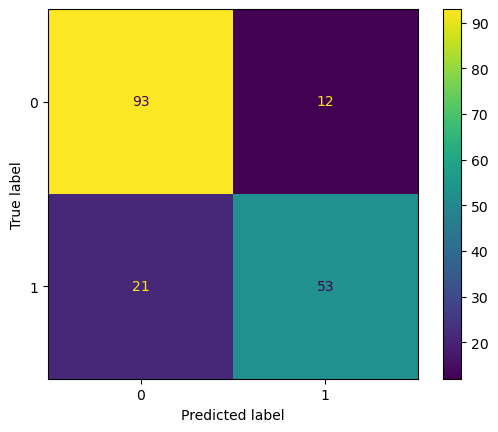

In [21]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();